In [1]:
import pandas as pd

allergy_data = pd.read_csv('../Data/food-allergy-analysis-Zenodo.csv')
display(allergy_data.head(10))
allergy_data.shape

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P1 - Medicaid,False,0.087611,4.958248,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2006,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.010951,6.677618,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.032854,6.286105,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.019165,6.726899,NaN,...,NaN,1.015743,1.015743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,True,0.021903,6.275154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(333200, 50)

In [2]:
allergy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333200 entries, 0 to 333199
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SUBJECT_ID               333200 non-null  int64  
 1   BIRTH_YEAR               333200 non-null  int64  
 2   GENDER_FACTOR            333200 non-null  object 
 3   RACE_FACTOR              333200 non-null  object 
 4   ETHNICITY_FACTOR         333200 non-null  object 
 5   PAYER_FACTOR             333200 non-null  object 
 6   ATOPIC_MARCH_COHORT      333200 non-null  bool   
 7   AGE_START_YEARS          333200 non-null  float64
 8   AGE_END_YEARS            333200 non-null  float64
 9   SHELLFISH_ALG_START      5246 non-null    float64
 10  SHELLFISH_ALG_END        1051 non-null    float64
 11  FISH_ALG_START           1796 non-null    float64
 12  FISH_ALG_END             527 non-null     float64
 13  MILK_ALG_START           7289 non-null    float64
 14  MILK

In [3]:
# 人種別が見やすいようにクレンジング
allergy_data['RACE_FACTOR'] = allergy_data['RACE_FACTOR'].str.split()
allergy_data['RACE_FACTOR'] = allergy_data['RACE_FACTOR'].str[2]
display(allergy_data['RACE_FACTOR'].head(10))

0      Black
1      White
2      White
3    Unknown
4      Black
5      White
6      White
7      Black
8      White
9      Black
Name: RACE_FACTOR, dtype: object

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

sns.set_theme(font_scale=1.5, font='IPAexGothic')

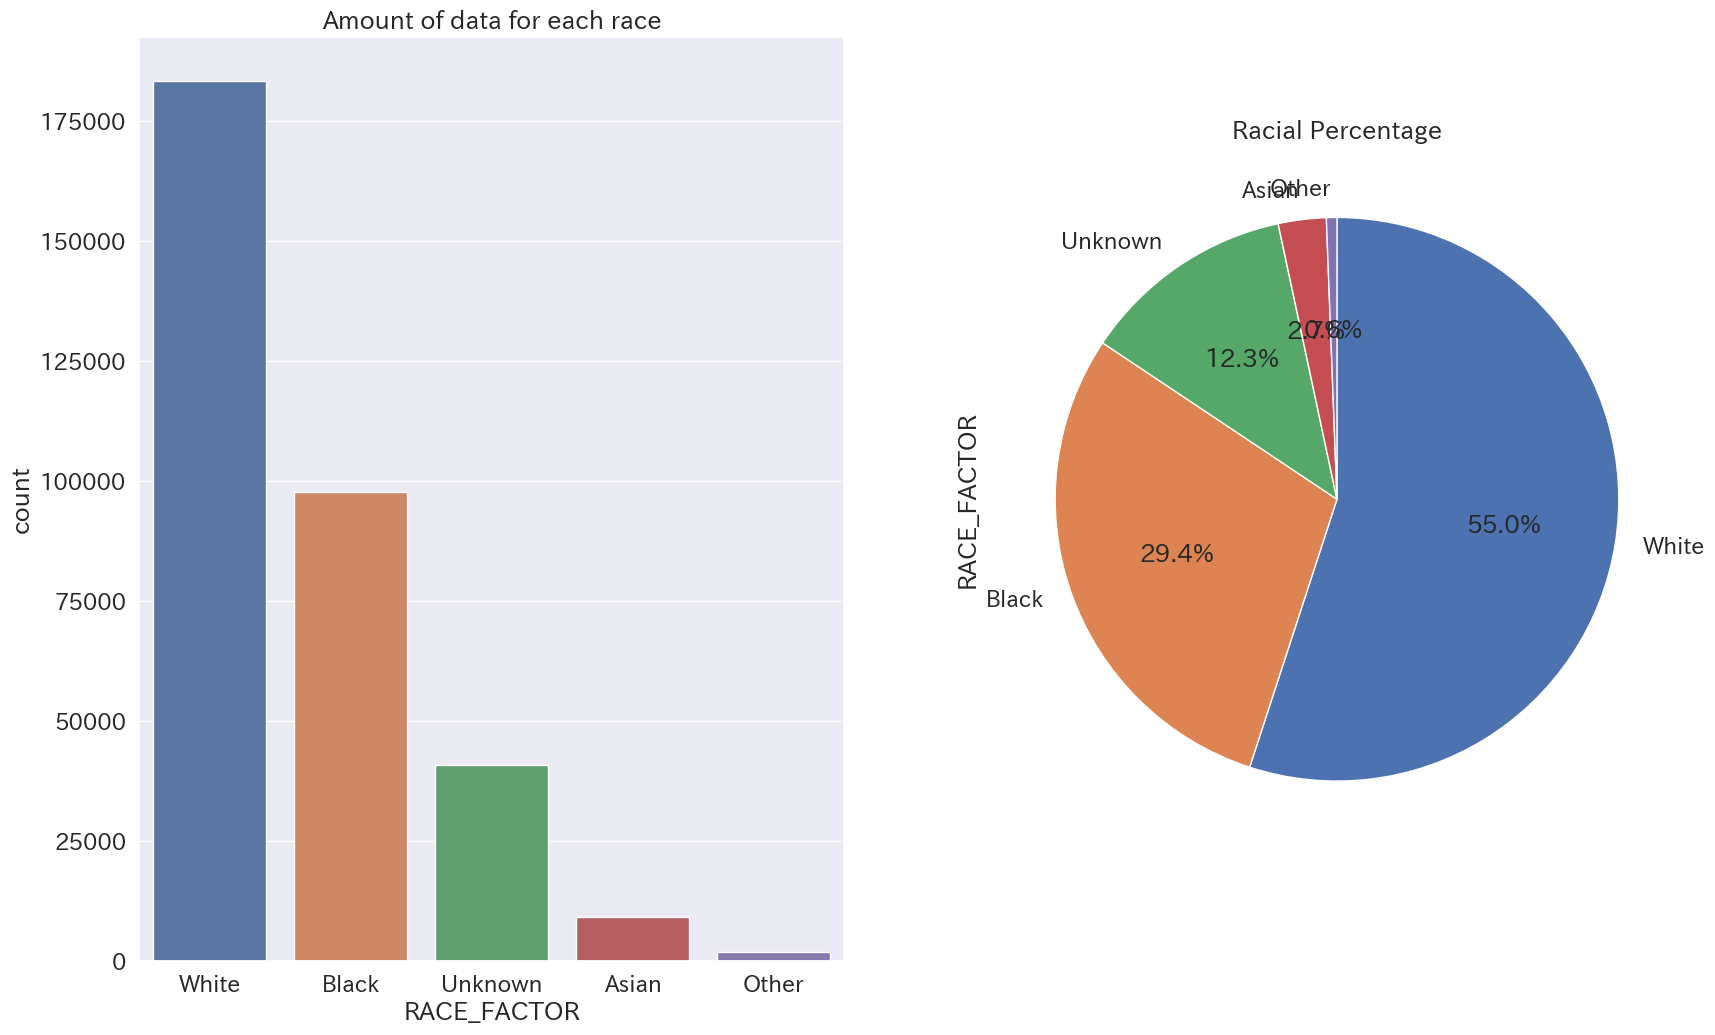

In [5]:
# 人種の分布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,12))

sns.countplot(x=allergy_data['RACE_FACTOR'], ax=ax1,
              order=allergy_data['RACE_FACTOR'].value_counts().index).set(title='Amount of data for each race')

allergy_data['RACE_FACTOR'].value_counts().plot.pie(counterclock = False, autopct = '%1.1f%%', pctdistance=.6,
                                                    startangle = 90, radius=1, ax=ax2).set(title='Racial Percentage')
# results_path = '../Graphs/Racial Percentage.png'
# plt.savefig(results_path, bbox_inches='tight')
plt.show()

In [6]:
# それぞれの人種が何人いるか
race_counts = allergy_data['RACE_FACTOR'].value_counts()
print(race_counts)

White      183308
Black       97795
Unknown     40940
Asian        9152
Other        2005
Name: RACE_FACTOR, dtype: int64


In [7]:
# データ量の差分の影響を無くすためにサンプリングする
Asian = allergy_data[allergy_data['RACE_FACTOR'].isin(['Asian'])].sample(n=9000)
White = allergy_data[allergy_data['RACE_FACTOR'].isin(['White'])].sample(n=9000)
Black = allergy_data[allergy_data['RACE_FACTOR'].isin(['Black'])].sample(n=9000)
display(Black.head(10))

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
278364,278365,2004,S1 - Female,Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.049281,3.028063,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49502,49503,2008,S1 - Female,Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.008214,4.960986,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.327858,1.327858,1.0
44155,44156,2008,S0 - Male,Black,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.008214,5.054073,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.590691,5.598905,5.0
255101,255102,1991,S1 - Female,Black,E0 - Non-Hispanic,P1 - Medicaid,False,12.016427,17.957563,NaN,...,NaN,12.016427,13.385352,13.385352,17.182752,12.016427,17.182752,12.016427,13.385352,2.0
250760,250761,1994,S0 - Male,Black,E0 - Non-Hispanic,P1 - Medicaid,False,8.010951,17.486653,NaN,...,NaN,10.176591,10.220397,8.010951,12.813142,8.010951,17.486653,9.147159,17.486653,7.0
37501,37502,1999,S0 - Male,Black,E0 - Non-Hispanic,P1 - Medicaid,False,2.674880,12.079398,NaN,...,NaN,NaN,NaN,8.251882,12.654346,NaN,NaN,NaN,NaN,NaN
183899,183900,1989,S0 - Male,Black,E0 - Non-Hispanic,P1 - Medicaid,False,12.279261,18.674880,NaN,...,NaN,NaN,NaN,12.279261,16.388775,12.279261,17.267625,12.150582,18.674880,14.0
202302,202303,1996,S0 - Male,Black,E0 - Non-Hispanic,P1 - Medicaid,False,5.938398,9.390828,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216947,216948,2002,S0 - Male,Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.021903,11.471595,NaN,...,NaN,NaN,NaN,1.505818,NaN,1.505818,11.471595,1.587953,11.471595,29.0
155274,155275,1993,S0 - Male,Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,8.632444,16.960986,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# 3つのcsvをmergeさせる
race_sample = pd.merge(Asian, White, on=['SUBJECT_ID', 'BIRTH_YEAR','GENDER_FACTOR', 'ETHNICITY_FACTOR','PAYER_FACTOR',
                                         'ATOPIC_MARCH_COHORT', 'AGE_START_YEARS','AGE_END_YEARS', 'SHELLFISH_ALG_START',
                                         'SHELLFISH_ALG_END','FISH_ALG_START', 'FISH_ALG_END','MILK_ALG_START',
                                         'MILK_ALG_END','SOY_ALG_START','SOY_ALG_END', 'EGG_ALG_START','EGG_ALG_END',
                                         'WHEAT_ALG_START','WHEAT_ALG_END','PEANUT_ALG_START', 'PEANUT_ALG_END',
                                         'SESAME_ALG_START', 'SESAME_ALG_END','TREENUT_ALG_START','TREENUT_ALG_END',
                                         'WALNUT_ALG_START','WALNUT_ALG_END', 'PECAN_ALG_START','PECAN_ALG_END',
                                         'PISTACH_ALG_START', 'PISTACH_ALG_END','ALMOND_ALG_START','ALMOND_ALG_END',
                                         'BRAZIL_ALG_START','BRAZIL_ALG_END', 'HAZELNUT_ALG_START','HAZELNUT_ALG_END',
                                         'CASHEW_ALG_START','CASHEW_ALG_END','ATOPIC_DERM_START', 'ATOPIC_DERM_END',
                                         'FIRST_ASTHMARX', 'LAST_ASTHMARX','NUM_ASTHMARX','RACE_FACTOR',
                                         'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END','ASTHMA_START',
                                         'ASTHMA_END'],how='outer')

race_sample = pd.merge(race_sample, Black, on=['SUBJECT_ID', 'BIRTH_YEAR','GENDER_FACTOR', 'ETHNICITY_FACTOR','PAYER_FACTOR',
                                         'ATOPIC_MARCH_COHORT', 'AGE_START_YEARS','AGE_END_YEARS', 'SHELLFISH_ALG_START',
                                         'SHELLFISH_ALG_END','FISH_ALG_START', 'FISH_ALG_END','MILK_ALG_START',
                                         'MILK_ALG_END','SOY_ALG_START','SOY_ALG_END', 'EGG_ALG_START','EGG_ALG_END',
                                         'WHEAT_ALG_START','WHEAT_ALG_END','PEANUT_ALG_START', 'PEANUT_ALG_END',
                                         'SESAME_ALG_START', 'SESAME_ALG_END','TREENUT_ALG_START','TREENUT_ALG_END',
                                         'WALNUT_ALG_START','WALNUT_ALG_END', 'PECAN_ALG_START','PECAN_ALG_END',
                                         'PISTACH_ALG_START', 'PISTACH_ALG_END','ALMOND_ALG_START','ALMOND_ALG_END',
                                         'BRAZIL_ALG_START','BRAZIL_ALG_END', 'HAZELNUT_ALG_START','HAZELNUT_ALG_END',
                                         'CASHEW_ALG_START','CASHEW_ALG_END','ATOPIC_DERM_START', 'ATOPIC_DERM_END',
                                         'FIRST_ASTHMARX', 'LAST_ASTHMARX','NUM_ASTHMARX','RACE_FACTOR',
                                         'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END','ASTHMA_START',
                                         'ASTHMA_END'],how='outer')

race_sample.shape
# display(race_sample.head(10))
# race_sample.to_csv('../Data/race_sample.csv', mode='w', index=False)

(27000, 50)